In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nilearn

In [3]:
# Importing Dataset

from nilearn.datasets import fetch_abide_pcp
from nilearn.connectome import ConnectivityMeasure

data = fetch_abide_pcp(derivatives=['rois_cc200'], SITE_ID=['NYU']) # Extracting fMRI data from NYU repository wrt AAL atlas

In [4]:
# Pre-processing the data

conn_est = ConnectivityMeasure(kind='correlation') # Connectivity Estimator
conn_matrices = conn_est.fit_transform(data['rois_cc200'])
print(conn_matrices)

[[[ 1.00000000e+00  3.07399571e-01  3.14501636e-01 ...  1.45962806e-01
    1.15165824e-01  3.93456892e-01]
  [ 3.07399571e-01  1.00000000e+00  3.74888894e-01 ...  3.08813706e-01
    2.96041202e-01  5.24706628e-01]
  [ 3.14501636e-01  3.74888894e-01  1.00000000e+00 ...  3.95019290e-01
    3.50134770e-01  5.25570230e-01]
  ...
  [ 1.45962806e-01  3.08813706e-01  3.95019290e-01 ...  1.00000000e+00
    1.32925407e-01  4.58621242e-01]
  [ 1.15165824e-01  2.96041202e-01  3.50134770e-01 ...  1.32925407e-01
    1.00000000e+00  2.88548663e-01]
  [ 3.93456892e-01  5.24706628e-01  5.25570230e-01 ...  4.58621242e-01
    2.88548663e-01  1.00000000e+00]]

 [[ 1.00000000e+00 -3.75008009e-02  1.31398108e-02 ...  1.84981972e-01
   -7.38285494e-02  2.69454391e-01]
  [-3.75008009e-02  1.00000000e+00  6.05750891e-01 ... -1.35640765e-01
    1.96350126e-01  1.37017473e-01]
  [ 1.31398108e-02  6.05750891e-01  1.00000000e+00 ...  4.23130989e-03
    2.29959442e-01  1.73792267e-01]
  ...
  [ 1.84981972e-01 -1.3

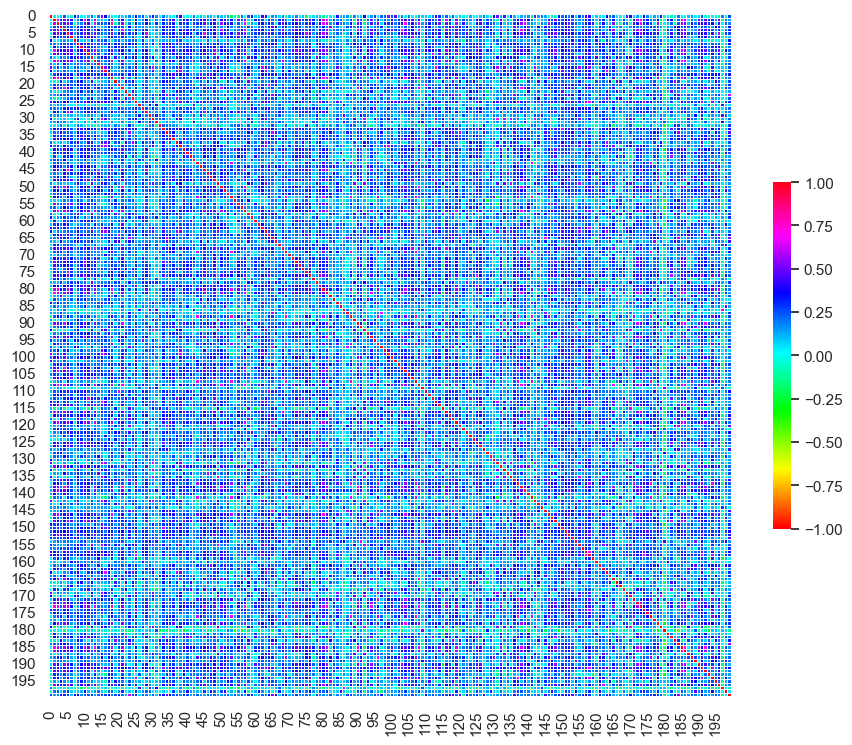

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming conn_matrices[1] is already defined

corr = conn_matrices[1]
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap='hsv', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)

plt.show()


<Axes: >

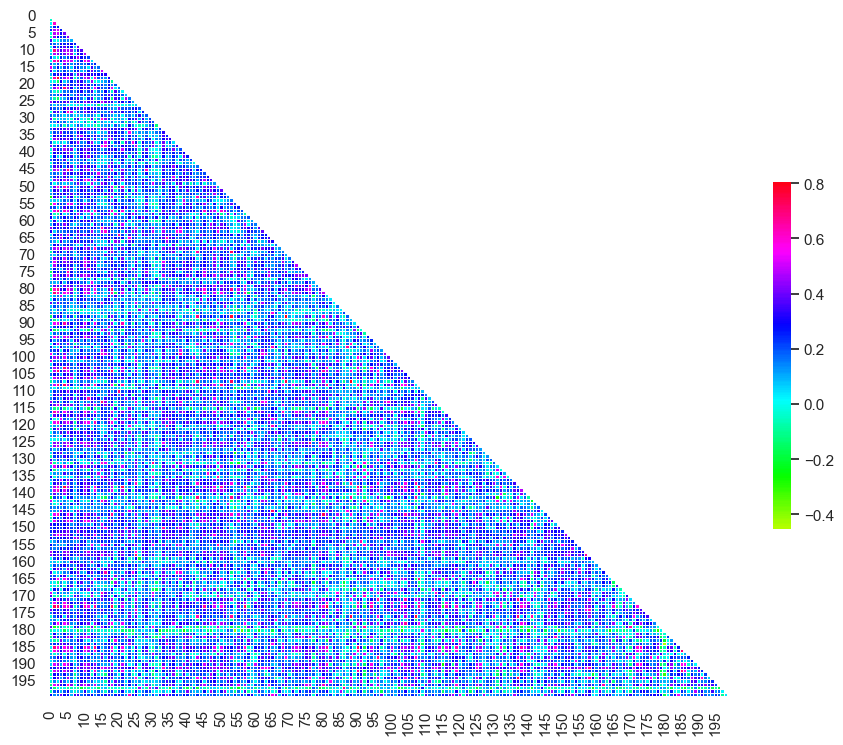

In [6]:
import seaborn as sns

corr = conn_matrices[1]
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='hsv', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
# shape of input

print(conn_matrices.shape)

(172, 200, 200)


In [8]:
# conn_matrices is a matrix that contains the correlation of different ROIs for each sample
# conn_matrices[i][j][k] -> correlation between ROI j and ROI k for subject i

# It is to note that connectivity matrices are symmetric matrices. Let flatten this matrix into a vector

sym_vec_matrices = [conn_matrix[np.triu_indices_from(conn_matrix, k=1)] for conn_matrix in conn_matrices]# Converting sym. matrix into vector
X=sym_vec_matrices
#print(X.shape)

In [9]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = y.reshape(y.shape[0], 1)
y = ohe.fit_transform(y).toarray()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Neural network
model = Sequential()
model.add(Dropout(0.8))

# Hidden Layer 1
model.add(Dense(32, input_dim=19900, activation='relu'))
model.add(Dropout(0.8))  # Dropout layer with dropout rate of 0.8

# Hidden Layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.8)) # Dropout layer with dropout rate of 0.8


# Output Layer
model.add(Dense(2, activation='sigmoid'))  # Use sigmoid activation for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
14/14 [==============================] - 2s 15ms/step - loss: 4.7033 - accuracy: 0.5255
Epoch 2/100
14/14 [==============================] - 0s 14ms/step - loss: 6.3948 - accuracy: 0.5474
Epoch 3/100
14/14 [==============================] - 0s 14ms/step - loss: 5.0164 - accuracy: 0.5255
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 7.2716 - accuracy: 0.4161
Epoch 5/100
14/14 [==============================] - 0s 14ms/step - loss: 6.0069 - accuracy: 0.5328
Epoch 6/100
14/14 [==============================] - 0s 14ms/step - loss: 7.4447 - accuracy: 0.5547
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 6.7653 - accuracy: 0.5036
Epoch 8/100
14/14 [==============================] - 0s 14ms/step - loss: 8.5745 - accuracy: 0.5109
Epoch 9/100
14/14 [==============================] - 0s 14ms/step - loss: 8.1146 - accuracy: 0.5182
Epoch 10/100
14/14 [==============================] - 0s 14ms/step - loss: 7.9689 - accuracy: 0.5693

14/14 [==============================] - 0s 14ms/step - loss: 1.2593 - accuracy: 0.6204
Epoch 83/100
14/14 [==============================] - 0s 14ms/step - loss: 0.9659 - accuracy: 0.6788
Epoch 84/100
14/14 [==============================] - 0s 14ms/step - loss: 1.6125 - accuracy: 0.6131
Epoch 85/100
14/14 [==============================] - 0s 14ms/step - loss: 0.8024 - accuracy: 0.7226
Epoch 86/100
14/14 [==============================] - 0s 15ms/step - loss: 1.0803 - accuracy: 0.6058
Epoch 87/100
14/14 [==============================] - 0s 14ms/step - loss: 0.9935 - accuracy: 0.6204
Epoch 88/100
14/14 [==============================] - 0s 14ms/step - loss: 0.9516 - accuracy: 0.5985
Epoch 89/100
14/14 [==============================] - 0s 14ms/step - loss: 0.7903 - accuracy: 0.6131
Epoch 90/100
14/14 [==============================] - 0s 14ms/step - loss: 1.0292 - accuracy: 0.6277
Epoch 91/100
14/14 [==============================] - 0s 14ms/step - loss: 1.1535 - accuracy: 0.6131
Epo

In [15]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
print(pred)
print(test)

2/2 [==============================] - 0s 5ms/step
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]


In [16]:
from sklearn.metrics import accuracy_score,classification_report
report = classification_report(pred, test)
a = accuracy_score(pred,test)
print('Complete Classification Report:\n', report)
print('Accuracy is:', a*100)

# Print individual components

Complete Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.60      0.32         5
           1       0.90      0.63      0.75        30

    accuracy                           0.63        35
   macro avg       0.56      0.62      0.53        35
weighted avg       0.81      0.63      0.68        35

Accuracy is: 62.857142857142854


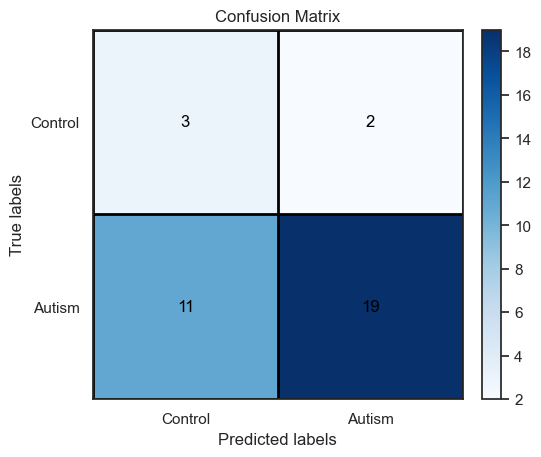

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming pred and test are your predicted and true labels

conf_matrix = confusion_matrix(pred, test)

fig, ax = plt.subplots()

# Plot the heatmap
im = ax.imshow(conf_matrix, cmap='Blues')

# Add text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, f'{conf_matrix[i, j]}', ha='center', va='center', color='black', fontsize=12)

# Customize xticks and yticks
ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))
ax.set_xticklabels(['Control', 'Autism'])
ax.set_yticklabels(['Control', 'Autism'])

# Add grid lines
ax.set_xticks(np.arange(conf_matrix.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(conf_matrix.shape[0] + 1) - 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [18]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [19]:
y[y == 2] = -1
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [20]:
from sklearn import svm
from sklearn.model_selection import cross_validate

# Now, as there are various hyperparameters associated with SVM, we will tune it to 
# see which configuration gives the best result

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

C = []
gamma = []

for i in range(-5, 16):
    C.append(2**i)

for i in range(-15, 4):
    gamma.append(2**i)

In [21]:
# Let's start with linear kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='linear', gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,...,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765
0.000061,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,...,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765
0.000122,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,...,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765
0.000244,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,...,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765
0.000488,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,...,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765
0.000977,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,...,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765
0.001953,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,...,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765
0.003906,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,...,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765
0.007812,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,...,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765
0.015625,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,...,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765,0.691765


In [22]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [23]:
def Plot3D(df, title):
    X = []
    Y = []
    Z = []
    for i in range(-5, 16):
        for j in range(-15, 4):
            x = 2 ** i
            y = 2 ** j
            z = df[x][y]
            X.append(i)
            Y.append(j)
            Z.append(z)
    newdf = pd.DataFrame({'x': X, 'y': Y, 'z': Z}, index=range(len(X)))
    fig = plt.figure(dpi=150,figsize=(10, 8))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('C (in log scale)')
    ax.set_ylabel('Gamma (in log scale)')
    ax.set_zlabel('Accuracy observed',labelpad=0)
    ax.set_title(title)
    ax.plot_trisurf(newdf.x, newdf.y, newdf.z, cmap=cm.cividis, linewidth=0.2)
    plt.show()


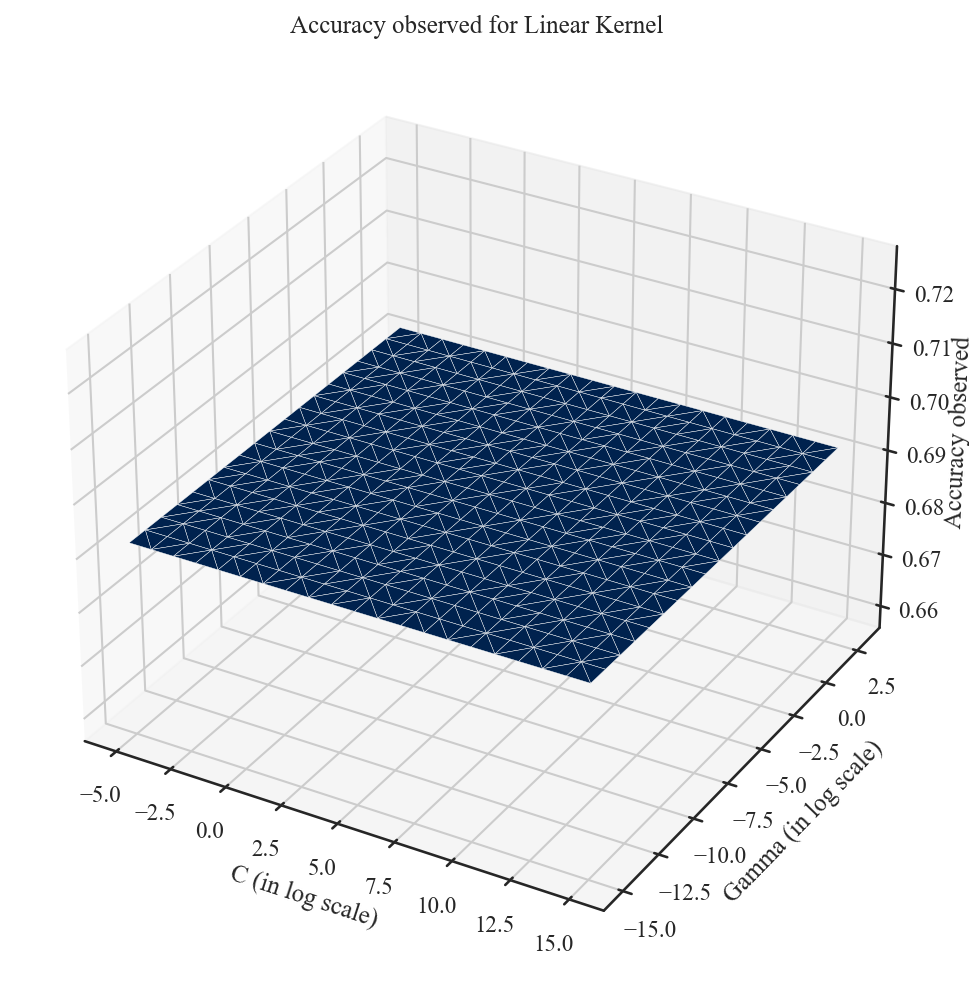

In [24]:
Plot3D(df, 'Accuracy observed for Linear Kernel')

In [68]:
# Using radial kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='rbf', gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.500840,0.500840,0.500840,0.489412,0.535462,0.552773,0.650756,0.674286,0.674286,0.674286,...,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286
0.000061,0.512605,0.512605,0.483193,0.465546,0.511933,0.622185,0.674286,0.674286,0.674286,0.674286,...,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286
0.000122,0.542017,0.500840,0.500840,0.465546,0.465546,0.633950,0.610756,0.610756,0.610756,0.610756,...,0.610756,0.610756,0.610756,0.610756,0.610756,0.610756,0.610756,0.610756,0.610756,0.610756
0.000244,0.489076,0.489076,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.000488,0.512605,0.512605,0.489076,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.000977,0.489076,0.489076,0.489076,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.001953,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.003906,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.007812,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.015625,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748


In [69]:
df.describe()

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.478859,0.476692,0.472667,0.466802,0.471667,0.574993,0.581672,0.582910,0.582910,0.582910,...,0.582910,0.582910,0.582910,0.582910,0.582910,0.582910,0.582910,0.582910,0.582910,0.582910
std,0.022684,0.017744,0.012795,0.005475,0.018750,0.019202,0.030250,0.033538,0.033538,0.033538,...,0.033538,0.033538,0.033538,0.033538,0.033538,0.033538,0.033538,0.033538,0.033538,0.033538
min,0.465546,0.465546,0.465546,0.465546,0.465546,0.552773,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
25%,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
50%,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
75%,0.489076,0.489076,0.474370,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
max,0.542017,0.512605,0.500840,0.489412,0.535462,0.633950,0.674286,0.674286,0.674286,0.674286,...,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286,0.674286


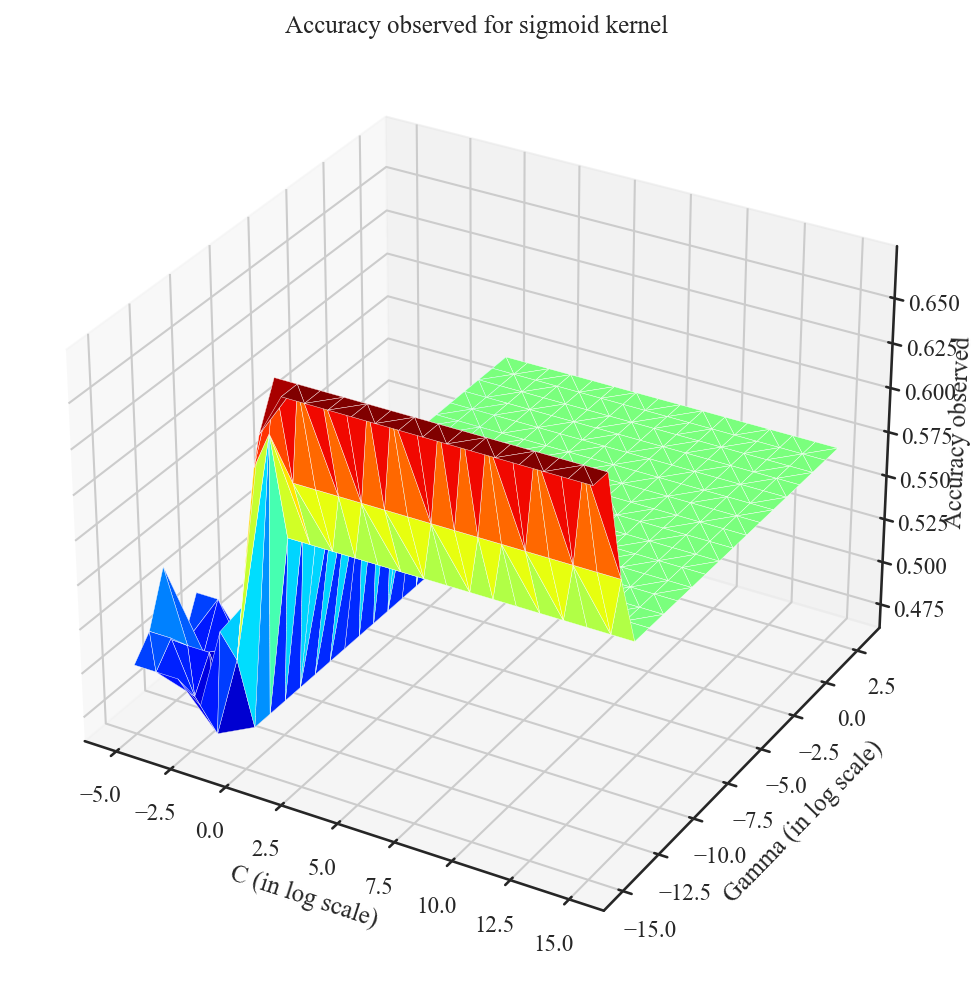

In [70]:
Plot3D(df, 'Accuracy observed for sigmoid kernel')

In [71]:
# Using quadratic kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='poly', degree=2, gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.465546,0.465546,0.500840,0.581345,0.581345,0.575462,0.575294,0.558151,0.534958,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
0.000061,0.500840,0.581345,0.581345,0.575462,0.575294,0.558151,0.534958,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
0.000122,0.581345,0.575462,0.575294,0.558151,0.534958,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
0.000244,0.575294,0.558151,0.534958,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
0.000488,0.534958,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
0.000977,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
0.001953,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
0.003906,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
0.007812,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
0.015625,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076


In [72]:
df.describe()

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.529739,0.532455,0.533083,0.535798,0.534569,0.533047,0.531818,0.530606,0.529385,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
std,0.023247,0.023032,0.017312,0.016449,0.015509,0.012242,0.010614,0.006670,0.001350,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,0.465546,0.465546,0.500840,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
25%,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
50%,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
75%,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076
max,0.581345,0.581345,0.581345,0.581345,0.581345,0.575462,0.575294,0.558151,0.534958,0.529076,...,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076,0.529076


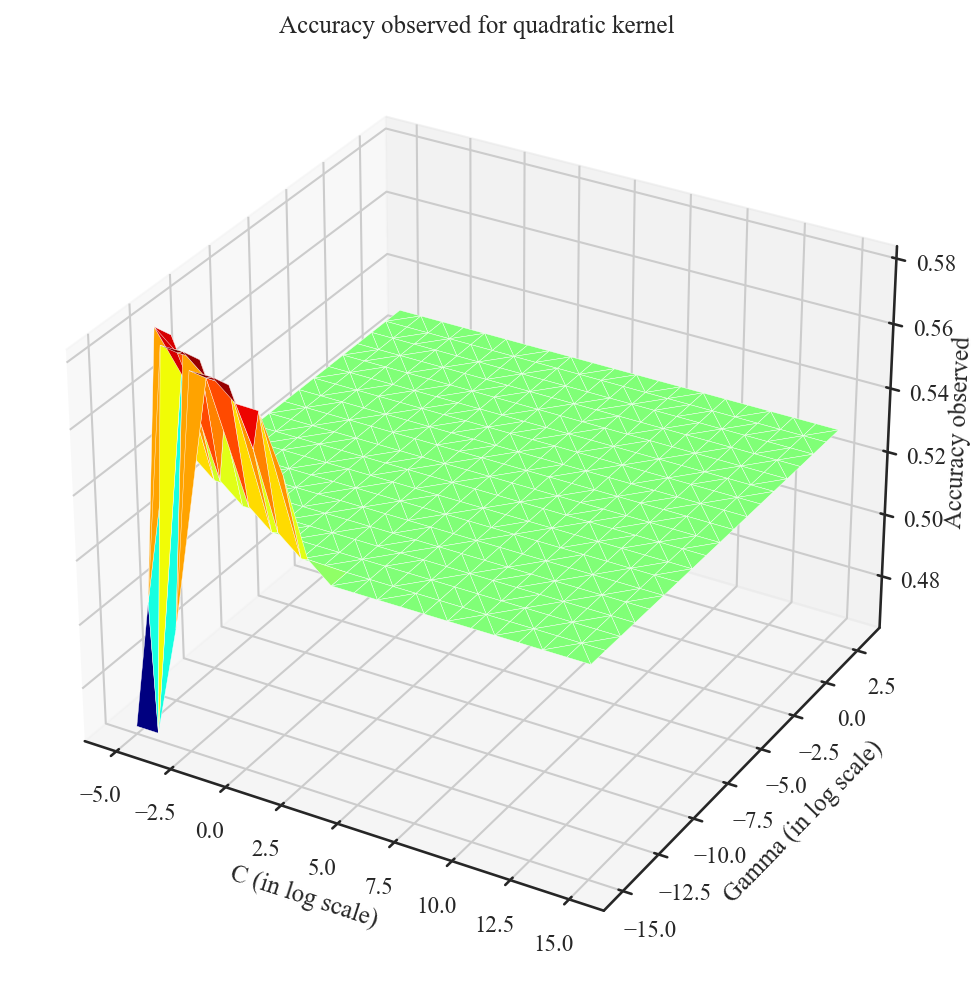

In [73]:
Plot3D(df, 'Accuracy observed for quadratic kernel')